# Informatics 1 Cognitive Science - Assignment 2

------------------------

## Academic misconduct

This assignment is intended to be completed individually. Please make sure you are familiar with the [school's academic misconduct policy](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct).

## Answering questions

The assignment notebooks include a combination of instructions, code that has been written for you to use, run, or examine, and questions you need to answer.

### Code

In every place where you need to write code you will see:

    # YOUR CODE HERE

Delete any raise NotImplementedError() (if applicable) and write your solution code inside the marked cell.

In general, you should write your solutions so the notebook can be run from start-to-finish, from scratch. To check this, you can open the "Kernel" menu above and select "restart and run all". This will restart the kernel and run all cells from first to last.

In this assignment, there is some code that has been written for you to experiment with. It may be useful to **make a copy of the code in a cell below** before you edit it, so that you retain the original version.

### Text

For questions that require you to write text the cell will say `YOUR ANSWER HERE`. Again delete that line if you want to answer the question and write your response in the marked cell.

Most of the cells that already contained text or calculations will be read-only. You can open new cells for additional calculation or notes, but please try to give answers in the requested cells wherever possible.

## Submission

Your coursework should be submitted on Noteable. **Do not change the name of the coursework file before submission**. If you are having issues with submission please send an email to the course TA and **attach a copy of your completed notebook**.

## Marking

Please consult the [Common Marking Scheme](https://web.inf.ed.ac.uk/infweb/student-services/ito/students/common-marking-scheme) for information how we mark coursework. In particular note that a mark above 75% requires the following: *Connections have been made both within and beyond the brief. Learning can be applied to unfamiliar situations or problems and may extend current theory. It is questioning, speculative and reflective.* 

This will be assessed, in part, using your text answers, so please pay attention to these, and not just the coding parts. In the text answers we will be looking for evidence of sound understanding of the subject matter. Marks above 80% document evidence of original, independent thinking. In other words, think about relevant context when giving your answers, but remain focussed on the question. Remember, it's quality, not quantity, that matters for a good answer. Also note that we will not mark your coding style. Any coding question will receive full marks if it produces the requested result.

In [1]:

# imports required for all tasks

# import numpy, the python scientific package
import numpy as np

# test images from scipy
from scipy import misc

# import maplotlib to plot the visualizations
from matplotlib import pyplot as plt
#this is to output the plots in the notebook
%matplotlib inline

# Let's also hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


---

# 1. Simple neuron models. (25 points)

The code below simulates two neuron models. Each neuron receives the same input current $I(t)$, which here is random and drawn from a Gaussian distribution.

You task is to compare these models.

You can run the cell and modify the code to inspect the two models. The code does not have to be in its original form when you submit, only the answers below will be marked. 

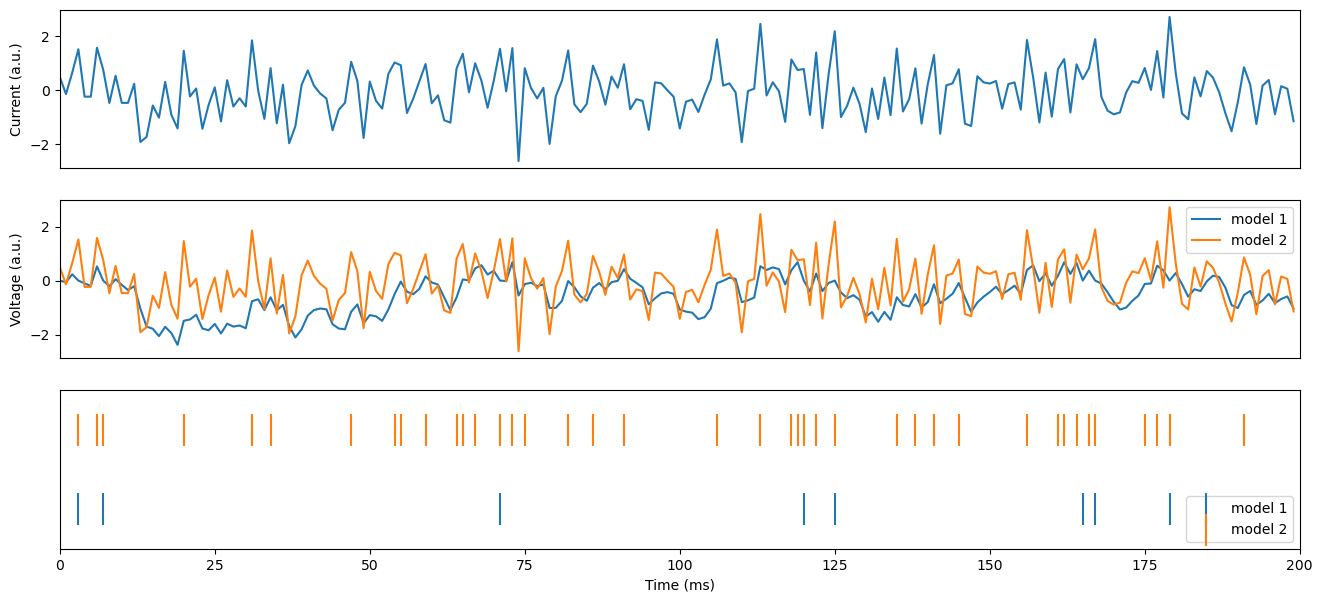

In [2]:

# simulation parameters
# simulation time (in milliseconds)
t_max = 200
# generate an input current
np.random.seed(42)
I = np.random.normal(size=t_max)
# Spike threshold
threshold = 0.75

# plot the input current
plt.figure(figsize=(16,7))
plt.subplot(311)
plt.plot(I)
plt.xlim(0,t_max)
plt.xticks(())
plt.ylabel('Current (a.u.)')

# simulate model 1
V1 = np.zeros(t_max)
spikes1 = []
for t in range(1,t_max):
    V1[t] = V1[t-1] + 1/10 * (-V1[t-1] + 4.46*I[t]) 
    # aside: the factor 4.46 in the line above was added 
    # to make V1 and V2 have approx. the same variance (when there are no spikes)
    if V1[t]>threshold:
        spikes1.append(t)
        V1[t] = 0

# simulate model 2
V2 = I
spikes2 = np.where(V2>threshold)[0]

# plot the results
plt.subplot(312)
plt.plot(V1, label='model 1')
plt.plot(V2, label='model 2')
plt.xlim(0,t_max)
plt.xticks(())
plt.ylabel('Voltage (a.u.)')
plt.legend()

plt.subplot(313)
plt.scatter(spikes1, np.zeros(len(spikes1)), marker='|', s=500, label='model 1')
plt.scatter(spikes2, np.ones(len(spikes2)), marker='|', s=500, label='model 2')
plt.xlim(0,t_max)
plt.ylim(-.5,1.5)
plt.yticks(())
plt.xlabel('Time (ms)')
plt.legend()
np.std(V1), np.std(V2);


<div class="alert alert-info" role="alert">
<h1>Exercise 1a)</h1>
<p>
    Explain how these models work and state the equations.
    
    (8 points)
    
</p>
</div>


Note you can write LaTeX code enclosing expressions in the single or double dollar sign, e.g. $x^2$

Both models depend on predefined thresholds and a given input current. Once the threshold is met by each model, it causes a spike and the voltage resets. The first model is represented by the equation $ V(t) = V(t-1) + 0.1(-V(t-1) + 4.46*I(t)).$ It is called the leaky integrate and fire model, as discussed in class. The 4.46 factors works to ensure that the variance of both models is the same. The 0.1 is a change measure added to account for the impact of the current voltage and previous voltage, as both have effects on the firing of neurons. The unique coefficients provide fascinating questions of where they arise and what model was used to discern them. The second model is simpler and is represented by the equation $V(t) = I(t)$. For both models, when $V(t) > threshold$, spikes occurring and voltage gets put to zero. It works by cycling through each value and comparing it with the threshold. Both models offer valuable information regarding how diffent types of neurons can be fired. Not all neurons are the same model. By comparing models, we learn valuable information about when certain types of neurons may be fired and how.

<div class="alert alert-info" role="alert">
<h1>Exercise 1b)</h1>
<p>
Explain how the spiking differs between the two models, and explain which components of the model cause those differences.
    
    (8 points)
</p>
</div>

The spiking differs between the two models in multiple ways. Overall, model two has vastly more spikes than model one. The reason model two has vastly more spikes is because of the unique equation. The spikes depend on previous values of voltage and current. They build and branch, often cascading in bunches because of this. This also leads to the spikes in model two being more drastic. They go higher and lower, while model one's spikes take on a flatter and less drastic range. Model one's spikes are more spread out and less frequent because it is harder to hit the direct set threshold. It does not depend on voltage near it as well. This sparks an interesting conversation on what types of neurons would fall under each model and why. 

<div class="alert alert-info" role="alert">
<h1>Exercise 1c)</h1>
<p>
Explain which aspects of the activity of real neurons are captured by each model, and which are missing.
    
    (9 points)
</p>
</div>

The aspect of activity of real neurons that is artfully captured by model one is the influence of past activity on causing spikes. In real neurons, a previous voltage level or spike can make another more likely. One potential example of this would be the firing of a positive chemical such as dopamine or serotonin. The more that is released, the more that follows. On the other hand, model two captures a firing system that does not depend on previous levels. It just depends on the current level at hand. An example of this could be whether to move your hand or not. The firing of those neurons to signal this movement do not depend on if you thought about moving or just moved. It will move or not, in more of a simple binary captured by model two. In model one, it only looks at the voltage previous. However, some neurons take into consideration more than just the previous voltage. Model one misses the directness of model two while model two misses the impact of previous levels and other complex factors. Model one's threshold is consistent, while some neurons' threshold's change. Ultimately, both have negative and positive traits, which can be beneficial or hurtful for certain types of neurons. 

---

# 2. Receptive fields in the visual system. (25 points)

In this exercise we will explore receptive field models of neurons in the visual system. Specifically, here we will look at the spatial filtering neurons perform, and ignore the temporal aspects. Then we can define the receptive field of a neuron as a matrix of weights that scale each pixel, before the output is computed by summing the weighted pixels.

The following code creates three different receptive fields. Again, you may modify this to explore and understand the models, however you should not change the 3 lines starting with ```kernel```, as these define the models that you will be asked about below. Questions are below.

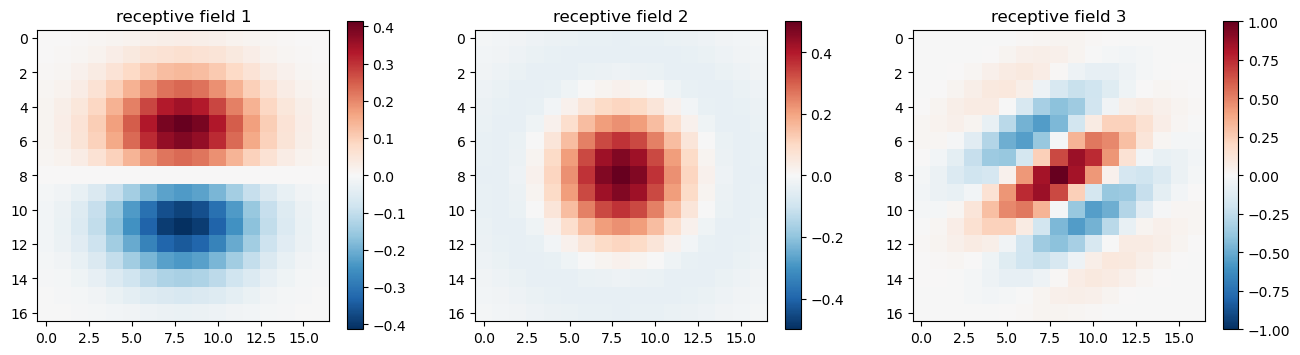

In [3]:

x = np.tile(np.arange(-8,9),(17,1))
y = x.T 

# the first model
s1=3
kernel1 = -np.exp(-(x*x+y*y)/(2*s1**2))*np.sin(y/4) # do not change this line

# the second model
s1=3
s2=4
kernel2 = np.exp(-(x*x+y*y)/(2*s1**2)) - 0.5*np.exp(-(x*x+y*y)/(2*s2**2)) # do not change this line

# the third model
s1=3
kernel3 = np.exp(-(x*x+y*y)/(2*s1**2))*np.cos((x.T/1.25+np.cos(np.pi/3)*y[:,0])) # do not change this line

# plot the matrices
plt.figure(figsize=(16,4))
for i,kernel in enumerate((kernel1,kernel2,kernel3)):
    plt.subplot(1,3,i+1)
    maxv = np.max((np.abs(np.min(kernel)), np.max(kernel)))
    plt.imshow(kernel, cmap=plt.cm.RdBu_r, vmin=-maxv, vmax=maxv)
    plt.colorbar()
    plt.title('receptive field {}'.format(i+1))


<div class="alert alert-info" role="alert">
<h1>Exercise 2a)</h1>
<p>
Describe the three receptive fields shown above. State which cell type each receptive field best matches, and where in the visual system these cells are found. Which feature in an image most strongly excites each cell type, and which features yield the weakest response?
    
    (12 points)
</p>
</div>




The first receptive field best matches simple cells, found in the visual cortex. This is because the field appears sensitive to a line or edge. Therefore, it alludes to a sensitivity to orientation i.e. a characteristic of simple cells. The feature that most strongly excites simple cells is oriented edges and gratings. The feature that yields the weakest response is to orthogonal or horizontal orientation. The second receptive field matches LGN cells, which are a part of the early visual system. The figure is able to detect contrast between light the best, which matches that of these cells. The LGN have center surround organization. They are excited by small points of light, while weaker when their is no visible light contrast. Lastly, the third receptive field is characteristic of complex cells found in V1. The field is sensitive to both horizonal and vertical components. The details of the field are more nuanced. Thus, they align with that of complex cells. These cells are most strongly excited by stark and varied spatial contrasts. The cells weakly elicit response for uniform light. 

<div class="alert alert-info" role="alert">
<h1>Exercise 2b)</h1>
<p>
    Now test your intuition on what type of filtering these receptive fields perform by computing the responses of these neurons to a natural image. To this end we assume we have as many neurons as pixels in the image, and the centre locations of the receptive fields match the pixel locations. Then we can use a simple convolution operation to predict the response of each neuron.
    
Show the predicted responses for each receptive field. Use an appropriate colour scale (use a diverging colormap with the zero clearly visible, as above), to indicate positive and negative responses.
    
    (5 points)
</p>
</div>

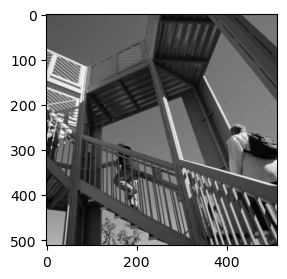

In [4]:

# some hints:

# here we use the 2D convolution function in scipy
from scipy.signal import convolve2d

# The test image as a 2D matrix:
image = misc.ascent()

# to see the original image, use:
plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
plt.imshow(misc.ascent(),cmap=plt.cm.gray)

# the result for the first receptive field
conv = convolve2d(image,kernel1)


Text(0.5, 1.0, 'Receptive Field 3')

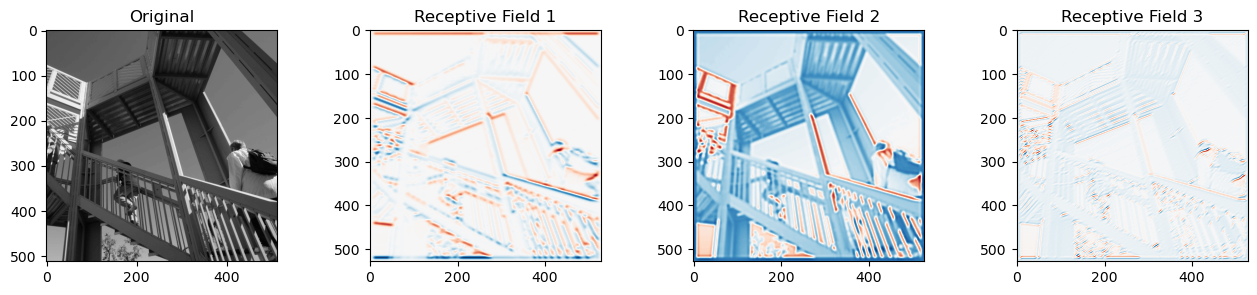

In [5]:
# Use the given fn to convolute each model from above
r1 = convolve2d(image, kernel1)
r2 = convolve2d(image, kernel2)
r3 = convolve2d(image, kernel3)

# Set up plot
plt.figure(figsize = (16,3))

# Plot original image
plt.subplot(1,4,1)
plt.imshow(misc.ascent(),cmap=plt.cm.gray)
plt.title('Original')

# Plot all receptive fields
plt.subplot(1, 4, 2)
plt.imshow(r1, cmap=plt.cm.RdBu_r)
plt.title('Receptive Field 1')

plt.subplot(1, 4, 3)
plt.imshow(r2, cmap=plt.cm.RdBu_r)
plt.title('Receptive Field 2')

plt.subplot(1, 4, 4)
plt.imshow(r3, cmap=plt.cm.RdBu_r)
plt.title('Receptive Field 3')

<div class="alert alert-info" role="alert">
<h1>Exercise 2c)</h1>
<p>
Describe and explain your results. Are the receptive fields indeed selective to the image features you predicted above? Why do neurons in the visual system respond in this way?
    
    (8 points)
</p>
</div>


The results are very interesting. They are indeed supportive of the ideas laid out above surrounding selective features. Receptive field 1 is more attuned to edges and gratings. This is highlighted by the outline of the structure shifting from red to blue. This makes sense because the model represents simple cells in V1. Receptive field two is selective to bouts of light, regardless of orientation. This is higlighted when comparing the intial image. There is a red where a lot of light falls and a lot of blue where there is mostly darkness to provide evidence for this. LGN neurons behave like this because they are in the beginning stages of the visual system. Thus, sorting into pieces is effective when a lot is thrown at the system. Lastly, receptive field 3 is more nuanced and complex. The results show slighter and more detailed shifts. This makes sense for the neurons in this visual system because it is later in the processing, whereas more fine tuning is needed, as opposed to sorting masses quickly. The results ultimately show a unique partitioning of sorting. There is definitely no need for each to sort everything. Rather, each field/cell specializes to same time and energy. When combing the knowledge from all three fields above, the brain recieves a lot more information than just a jack of all trades processesor.

---

# 3. A memory model. (25 points)

Here you will simulate the Hopfield model. This model simulates $M$ binary neurons with the following activity rule:

$$
\begin{eqnarray*}
s_{i}(t+1) & = & \Theta\left(\sum_{j=1}^{M}w_{ij}s_{j}(t)-\theta_{i}\right)\\
\Theta(a) & = & \begin{cases}
1 & a\geq0\\
0 & a<0
\end{cases}
\end{eqnarray*}
$$

The variable $s_i(t)$ is the activity of neuron $i$ at time $t$, and $w_{ij}$ is the weight between neurons $i$ and $j$. In the following we set the bias $\theta_{i}=0$.

The following learning rule is used to store a set of $N$ binary patterns $p_i^n\in\{0,1\}$ in this network:

$$w_{ij} = \frac{1}{N} \sum_{n=1}^N (p^n_{i}-s)(p^n_{j}-s)$$

The quantity $s$ is the sparseness of the patterns, which is the fraction of elements in the patterns that are 1. So if a pattern of length 20 contains 10 times the '0' and 10 times '1', $s=0.5$.

In other words, sparseness is the arithmentic mean (average) over all patterns: $s=<p^n>_N$.

An excellent summary of the Hopfield network is in chapter 42 in the following textbook (free online):
*MacKay, D. J. C. (2003). [Information Theory, Inference, and Learning Algorithms](http://www.inference.org.uk/mackay/itila/)*

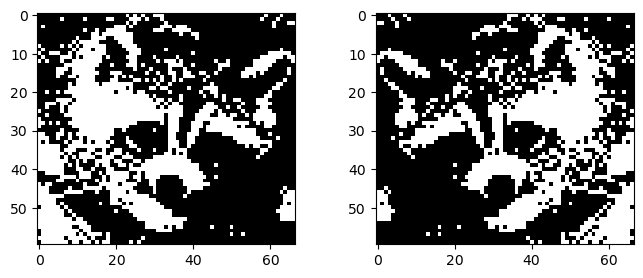

In [6]:

# Let's create a binary pattern to store, here we use a racoon:
image = misc.face(gray=True)[:600:10,280:950:10]>140
pattern = image.flatten().astype(int)

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(image, cmap=plt.cm.gray)

# We also use the mirror image of the same racoon
image2 = image[:,::-1]
pattern2 = image2.flatten().astype(int)

plt.subplot(122)
plt.imshow(image2, cmap=plt.cm.gray);


Now analyse the following code. Feel free to change it to experiment, the code is not part of the submission, only the answers below. It is probably best to make a copy of the original cell so you can go back after making changes.

0.12761194029850748
0.059203980099502486
0.003482587064676617
0.0
0.0
0.0


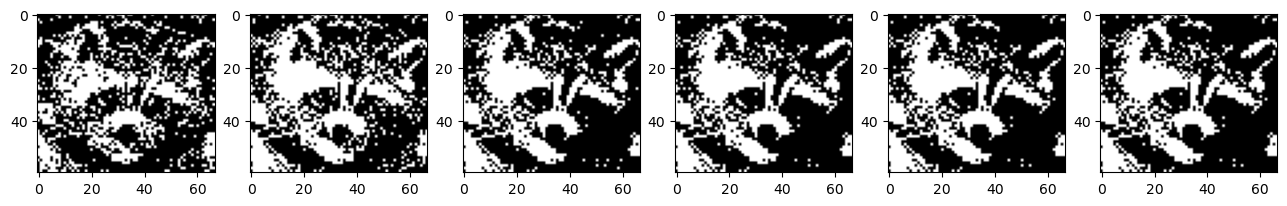

In [7]:

# parameters
N = 2 # number of patterns
M = pattern.shape[0] # number of neurons
sparseness = np.sum(pattern)/len(pattern)
bias = 0.3 # theta
T = 5 # number of time steps

# plotting
fig, ax = plt.subplots(T//6+1,6, figsize=(16,(T//6+1)*3))
ax = ax.flatten()

# part 1
w = np.random.randn(M,M)*2 # random initialisation
w += np.outer(pattern-sparseness, pattern-sparseness)
pattern2 = image[:,::-1].flatten().astype(int)
w += np.outer(pattern2-sparseness, pattern2-sparseness)
w = w/N

# part 2
np.random.seed(42)
s = np.copy(pattern)
corrupt = np.random.rand(M)>0.7 # weight
s[corrupt] = pattern2[corrupt]
print(np.sum((s-pattern)**2)/len(pattern))
ax[0].imshow(s.reshape(image.shape),cmap=plt.cm.gray)

# part 3
for t in range(T):
    s = (0.5 + 0.5 * np.sign((w @ s) - bias)).astype(int)
    ax[t+1].imshow(s.reshape(image.shape),cmap=plt.cm.gray)
    print(np.sum((s-pattern)**2)/len(pattern))


<div class="alert alert-info" role="alert">
<h1>Exercise 3a)</h1>
<p>Briefly describe in words what this program computes. Address the code in parts 1, 2 and 3 in turn in your description. Do not yet consider the output. What type of memory is simulated here?

(6 points)
</p>
</div>

This program starts by copying a percentage of an original binary image. Then, through the use of the hopfield model, the image gets increasingly more like the original until it is identical. A general description of the program is as follows. The code first creates a binary black and white panda image, along with the use of np.arrays to create the mirror image. Parameters for the hopfield model are set. Then, the model is implemented off of a corrupted imaged (70% of the points of the orignal image). The hopfield model is implemented and plotted for each T i.e. time loop. The type of memory simulated here is of the associative type. Part one uses spareness patterns i.e. amount of neural density and weights to learn the patterns. Part two is where the corrupted image is formed. Part three is where memory is tested and updated to form the correct image.

<div class="alert alert-info" role="alert">
<h1>Exercise 3b)</h1>
<p>Now look at the output this code generates (text and graphs). How do you interpret these?
    
(6 points)
</p>
</div>

The graphs show the progression of the hopfield model as it aligns the corrupt image more and more with the original until it is correct. The text output is how far off the corrupted image is from the orginal image that the model is trying to learn/recall. This is represented through mean squared error. Thus, at t = 4, the image is fully learned and the images 4-6 are identical to the original image. The images and output highlight the ability of Hopfield's model to portray an associative memory network until there is a perfect recall. One interesting point is that the network fully learns the original image. I wonder if this is feasible with our neurons. Is there a mean squared error of zero? I argue that this is likely untrue. We are living humans and prone to making even simple repetitive errors. Thus, this might be a limitation of the model. 

<div class="alert alert-info" role="alert">
<h1>Exercise 3c)</h1>
<p>What happens when you change the relative weight of the test pattern (the line marked with weight in the code)? 
    
(6 points)
</p>
</div>
 

When the relative weight of the test pattern is increased, the corrupted image becomes more corrupted. This means that less of the original points are in the image. Therefore, the model takes longer to learn the new image. It becomes increasingly difficult as the weight is lowered. On the contrary, when weight is increased, the image is less corrupted and easier to learn. It would be of use to graph the results as the weight is changed. One real world implication of this could hypothetically be learning/memory disabilities. If one starts with less information, then at what point does it become detrimental to learning the final image or 'picture' so to speak. On the contrary, what level of advantage is there to having more information at the start? These are broad scale and arbitrary claims, but provide useful pieces to ponder.

<div class="alert alert-info" role="alert">
<h1>Exercise 3d)</h1>
<p>
There is good evidence that this model recapitulates at least some aspects of how memories are stored in the brain. Examine which aspects of this model are biologically plausible, and which are not.
    
(7 points)
</p>
</div>
 

As shown above, the model is able to fully learn an image with a MSE of 0 after a certain point. This is biologically implausible because the brain is prone to errors, however miniscule. However, the model does provide a good conceptional tool for how memories are stored. As pieces are compared across different dimensions, a memory is stored. As time goes on, the brain is less likely to want to store all this information. Thus, the memory/image may get corrupted. However, the brain still wants access to the memory. Thus, the model/our brain are both able to relearn the memory with proper feedback/other mechanisms. Ultimately, the model elicts a unique discussion on the influence of memory and what 'T' i.e. what time frame we actually relearn these types of things. It sparks the question whether there are some neurons work better under a model similar, or benefit from a simpler, perhaps denser type of storing/learning model. 